# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
df = pd.read_csv('https://bit.ly/AW_SalesOrderHeader', sep='\t')

In [3]:
df.iloc[:2].T

,0,1
SalesOrderID,43659,43660
RevisionNumber,8,8
OrderDate,2011-05-31 00:00:00.000,2011-05-31 00:00:00.000
DueDate,2011-06-12 00:00:00.000,2011-06-12 00:00:00.000
ShipDate,2011-06-07 00:00:00.000,2011-06-07 00:00:00.000
Status,5,5
OnlineOrderFlag,0,0
SalesOrderNumber,SO43659,SO43660
PurchaseOrderNumber,PO522145787,PO18850127500
AccountNumber,10-4020-000676,10-4020-000117


# Get Years

In [4]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [5]:
print(df['OrderDate'].dt.year.unique())

[2011 2012 2013 2014]


# Use 2011's data

In [6]:
df_2011 = df[df['OrderDate'].dt.year == 2011]

In [7]:
print('semua tahun:', df.shape)
print('tahun 2011:', df_2011.shape)

semua tahun: (31465, 26)
tahun 2011: (1607, 26)


In [8]:
total_sales = df_2011['TotalDue'].sum()
total_orders = df['SalesOrderID'].nunique()

In [9]:
print(f"total sales 2011: ${total_sales:,.2f}")
print(f"total orders: {total_orders:,.0f}")

total sales 2011: $14,155,699.53
total orders: 31,465


# Sales Trends

In [10]:
daily_sales = df_2011.groupby('OrderDate')['TotalDue'].sum().reset_index()

In [11]:
daily_sales

,OrderDate,TotalDue
0,2011-05-31,567020.9498
1,2011-06-01,15394.3298
2,2011-06-02,16588.4572
3,2011-06-03,7907.9768
4,2011-06-04,16588.4572
...,...,...
207,2011-12-27,16391.4578
208,2011-12-28,17136.3364
209,2011-12-29,12437.4694
210,2011-12-30,29995.4296


<Figure size 1000x600 with 0 Axes>

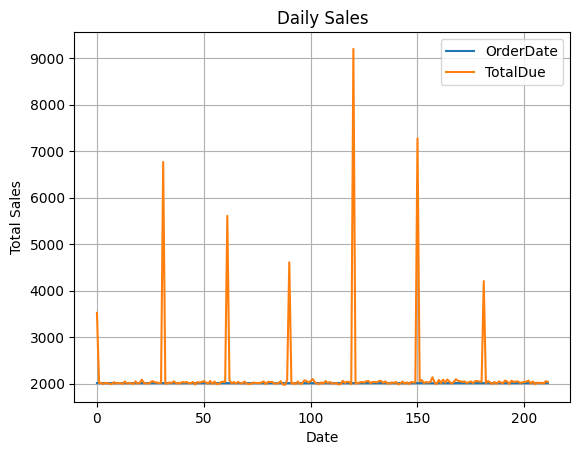

In [12]:
# Plot the daily sales
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [13]:
dailys_sales_sorted = daily_sales.sort_values('TotalDue', ascending=False)
dailys_sales_sorted['TotalDue'] = dailys_sales_sorted['TotalDue'].apply(lambda x: f"${x:,.2f}")

In [14]:
dailys_sales_sorted.head(10)

,OrderDate,TotalDue
120,2011-10-01,"$2,640,560.05"
150,2011-10-31,"$1,937,505.06"
31,2011-07-01,"$1,752,611.00"
61,2011-08-01,"$1,328,936.48"
90,2011-08-31,"$963,748.59"
181,2011-12-01,"$816,226.29"
0,2011-05-31,"$567,020.95"
157,2011-11-07,"$61,276.72"
101,2011-09-11,"$47,026.24"
168,2011-11-18,"$45,389.76"


# Top Customer

In [15]:
top_customers = df_2011.groupby('CustomerID')['TotalDue'].sum().reset_index()
top_customers = top_customers.sort_values('TotalDue', ascending=False)
top_customers['TotalDue'] = top_customers['TotalDue'].apply(lambda x: f"${x:,.2f}")

In [16]:
top_customers.head(10)

,CustomerID,TotalDue
1253,29624,"$279,655.51"
1338,29861,"$248,622.82"
1231,29562,"$219,899.12"
1277,29690,"$196,058.17"
1221,29525,"$187,361.08"
1291,29722,"$183,329.02"
1216,29515,"$181,624.19"
1283,29710,"$170,660.07"
1211,29507,"$169,762.99"
1404,30111,"$166,207.48"


In [17]:
top_customers = top_customers.head(10)

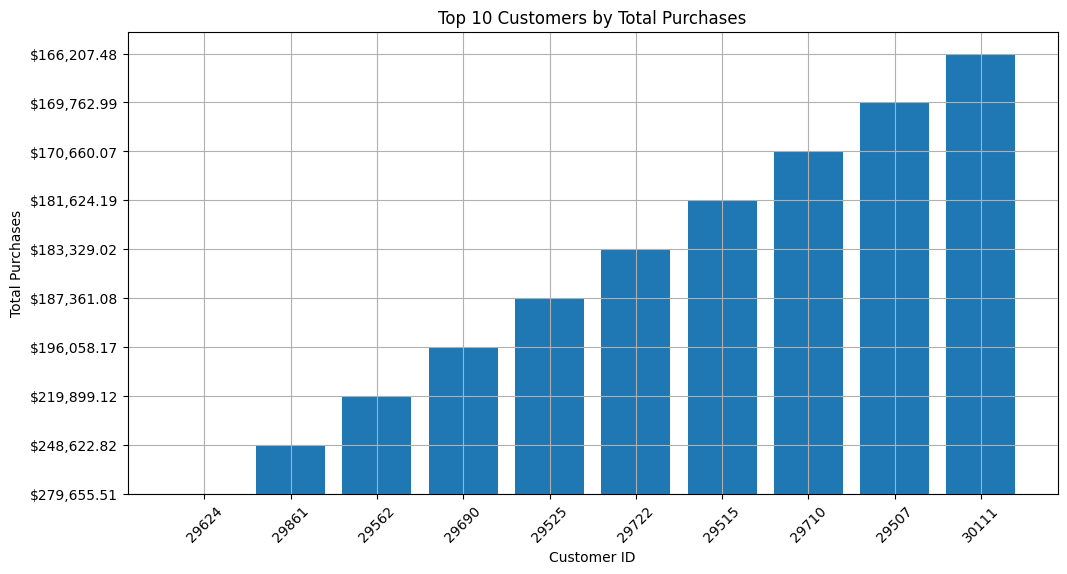

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['TotalDue'])
plt.title('Top 10 Customers by Total Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Territory

In [19]:
territory_sales = df_2011.groupby('TerritoryID')['TotalDue'].sum().reset_index()

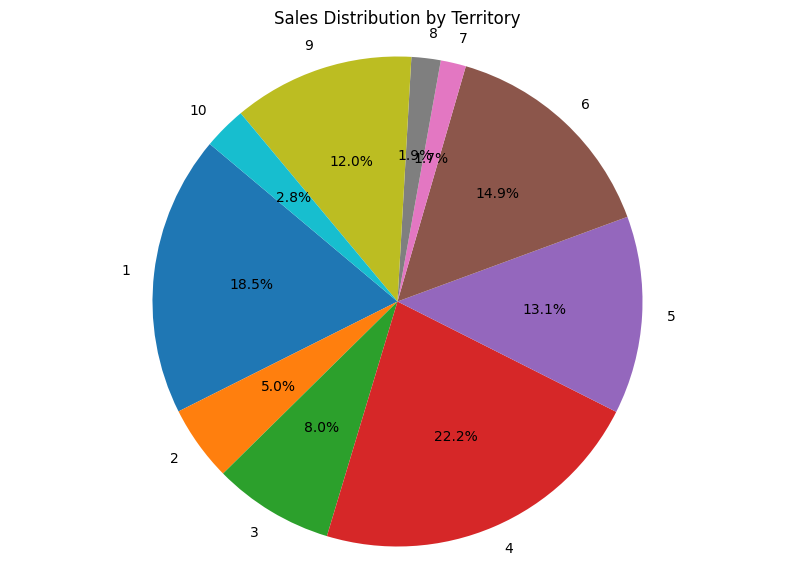

In [20]:
plt.figure(figsize=(10, 7))
plt.pie(territory_sales['TotalDue'], labels=territory_sales['TerritoryID'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Territory')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

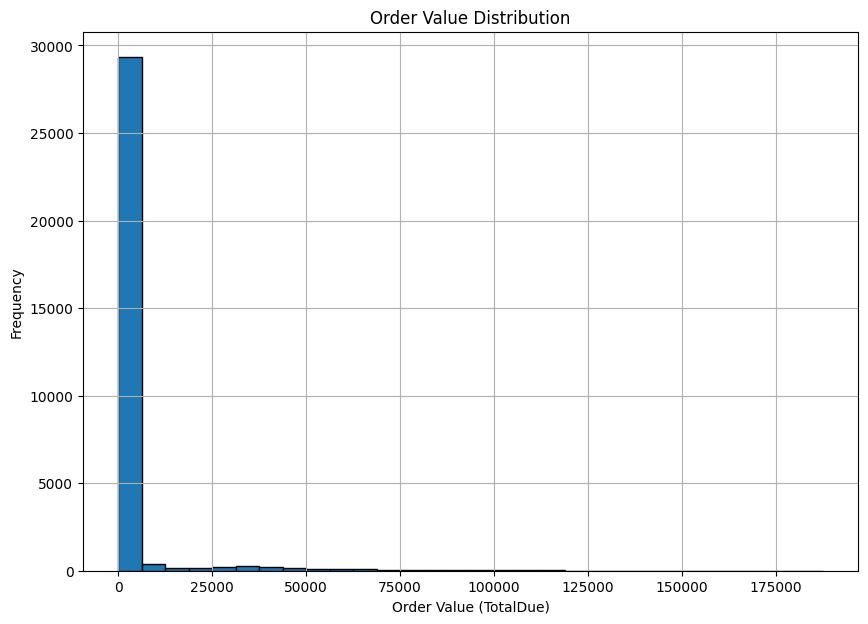

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(df['TotalDue'], bins=30, edgecolor='black')
plt.title('Order Value Distribution')
plt.xlabel('Order Value (TotalDue)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
df_2011['DayOfWeek'] = df_2011['OrderDate'].dt.day_name()
day_of_week_sales = df_2011.groupby('DayOfWeek')['TotalDue'].sum()

C:\Users\aansubarkah\AppData\Local\Temp\ipykernel_4784\3610038705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['DayOfWeek'] = df_2011['OrderDate'].dt.day_name()


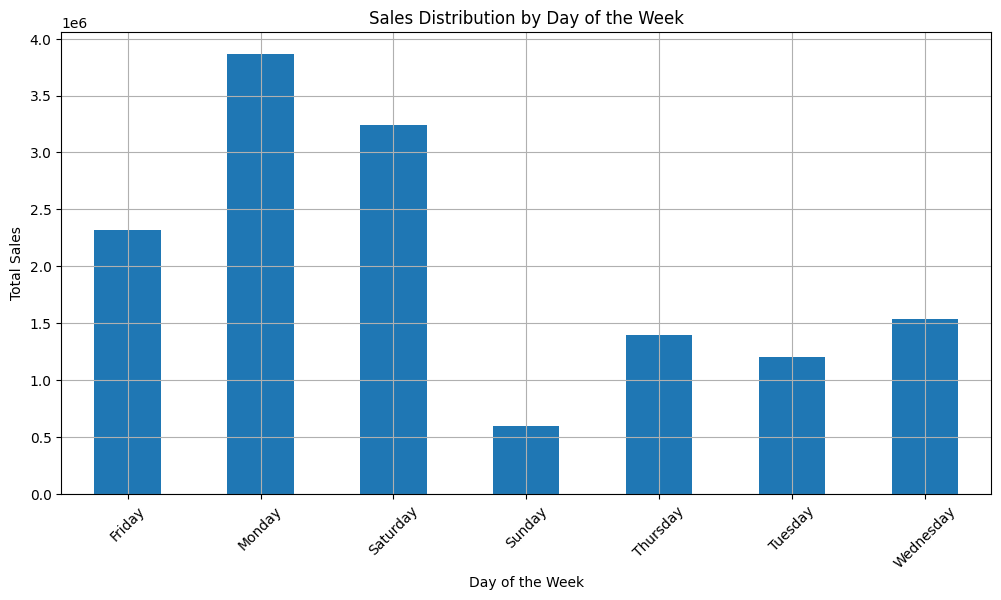

In [23]:
plt.figure(figsize=(12, 6))
day_of_week_sales.plot(kind='bar')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()